In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (pd.read_csv)

In [56]:
from datetime import datetime
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [57]:
df = pd.read_csv("data.csv", delimiter=',', encoding = "ISO-8859-1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [58]:
df.info()
df.describe(exclude=['float64','int64']).T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


In [59]:
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [60]:
df.dropna(inplace =True)


In [61]:
df.drop(df[df['Quantity'] < 0].index, inplace = True)
df.drop(df[df['UnitPrice'] < 0].index, inplace = True)

In [62]:
df[df['Quantity']<0].shape[0], df[df['UnitPrice']<0].shape[0] 

(0, 0)

In [63]:
df.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [64]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Last_transaction']=(df['InvoiceDate'].max()-df['InvoiceDate']).dt.days
lt = df.groupby(['CustomerID','Country'])['Last_transaction'].max().reset_index()
lt

,CustomerID,Country,Last_transaction
0,12346.0,United Kingdom,325
1,12347.0,Iceland,366
2,12348.0,Finland,357
3,12349.0,Italy,18
4,12350.0,Norway,309
...,...,...,...
4342,18280.0,United Kingdom,277
4343,18281.0,United Kingdom,180
4344,18282.0,United Kingdom,125
4345,18283.0,United Kingdom,336


In [65]:
nt=df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
nt

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


In [66]:
df['TotalAmount']= df['Quantity']*df['UnitPrice']
tm=df.groupby('CustomerID')['TotalAmount'].sum().reset_index()
tm

,CustomerID,TotalAmount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


In [67]:
merge1= pd.merge(lt, nt, how='inner', on='CustomerID')
new_df=pd.merge(merge1,tm,how='inner',on= 'CustomerID')
new_df

,CustomerID,Country,Last_transaction,InvoiceNo,TotalAmount
0,12346.0,United Kingdom,325,1,77183.60
1,12347.0,Iceland,366,182,4310.00
2,12348.0,Finland,357,31,1797.24
3,12349.0,Italy,18,73,1757.55
4,12350.0,Norway,309,17,334.40
...,...,...,...,...,...
4342,18280.0,United Kingdom,277,10,180.60
4343,18281.0,United Kingdom,180,7,80.82
4344,18282.0,United Kingdom,125,12,178.05
4345,18283.0,United Kingdom,336,756,2094.88


In [68]:
IQR= new_df['TotalAmount'].quantile(0.75)-new_df['TotalAmount'].quantile(0.25)
lower_limit= new_df['TotalAmount'].quantile(0.25) - 1.5*IQR
upper_limit=new_df['TotalAmount'].quantile(0.75) + 1.5*IQR
k=new_df[new_df['TotalAmount']>upper_limit]
m=new_df[new_df['TotalAmount']<lower_limit]
df_iqr=new_df[(new_df['TotalAmount']<upper_limit) & (new_df['TotalAmount']>lower_limit)]
print('Data shape before removing outlier',new_df.shape)
print('Data shape after removing outlier',df_iqr.shape)
print('Total number of outlier:',len(k)+len(m))

Data shape before removing outlier (4347, 5)
Data shape after removing outlier (3923, 5)
Total number of outlier: 424


In [69]:
df_iqr.reset_index(drop=True, inplace= True)
df_iqr

,CustomerID,Country,Last_transaction,InvoiceNo,TotalAmount
0,12348.0,Finland,357,31,1797.24
1,12349.0,Italy,18,73,1757.55
2,12350.0,Norway,309,17,334.40
3,12352.0,Norway,296,85,2506.04
4,12353.0,Bahrain,203,4,89.00
...,...,...,...,...,...
3918,18280.0,United Kingdom,277,10,180.60
3919,18281.0,United Kingdom,180,7,80.82
3920,18282.0,United Kingdom,125,12,178.05
3921,18283.0,United Kingdom,336,756,2094.88


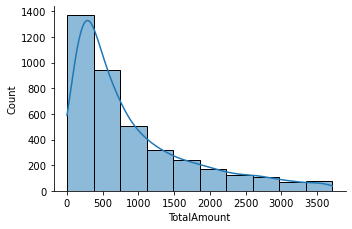

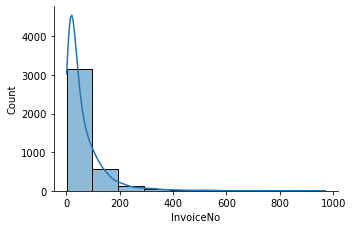

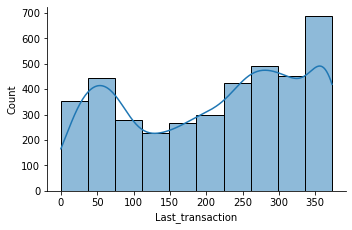

In [80]:
#Histogram Plot: 
new1_df=df_iqr.copy()
df_num=['TotalAmount','InvoiceNo','Last_transaction']
for i in df_num:
    sns.displot(new1_df[i],bins=10,kde=True)
    plt.gcf().set_size_inches(5, 3)
    plt.show()

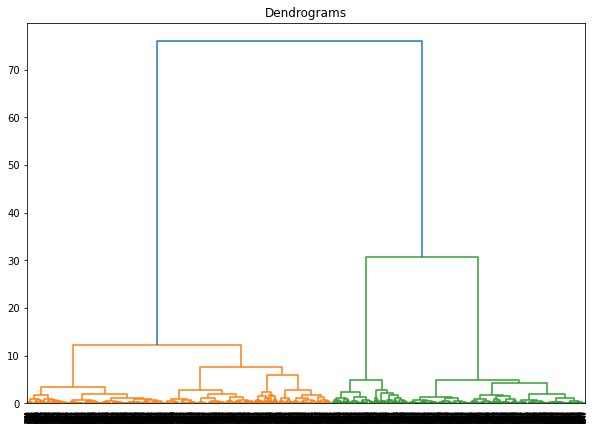

In [81]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_k, method='ward'))

In [71]:
new2_df=new1_df[['Last_transaction','InvoiceNo','TotalAmount']]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new2_df)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns=['Last_transaction','InvoiceNo','TotalAmount']
scaled_df['Country']=new1_df['Country']
scaled_df

,Last_transaction,InvoiceNo,TotalAmount,Country
0,0.957105,0.030960,0.484200,Finland
1,0.048257,0.074303,0.473507,Italy
2,0.828418,0.016512,0.090092,Norway
3,0.793566,0.086687,0.675160,Norway
4,0.544236,0.003096,0.023978,Bahrain
...,...,...,...,...
3918,0.742627,0.009288,0.048656,United Kingdom
3919,0.482574,0.006192,0.021774,United Kingdom
3920,0.335121,0.011352,0.047969,United Kingdom
3921,0.900804,0.779154,0.564388,United Kingdom


In [72]:
from sklearn.cluster import AgglomerativeClustering
cluster_new = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
two_clusters=cluster_new.fit_predict(df_k)

cluster_new = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
three_clusters=cluster_new.fit_predict(df_k)

df_k['two_clusters'] = two_clusters
df_k['three_clusters']= three_clusters
df_k

,Last_transaction,InvoiceNo,TotalAmount,two_clusters,three_clusters
0,0.957105,0.030960,0.484200,0,2
1,0.048257,0.074303,0.473507,1,0
2,0.828418,0.016512,0.090092,0,1
3,0.793566,0.086687,0.675160,0,2
4,0.544236,0.003096,0.023978,1,0
...,...,...,...,...,...
3918,0.742627,0.009288,0.048656,0,1
3919,0.482574,0.006192,0.021774,1,0
3920,0.335121,0.011352,0.047969,1,0
3921,0.900804,0.779154,0.564388,0,2


No handles with labels found to put in legend.


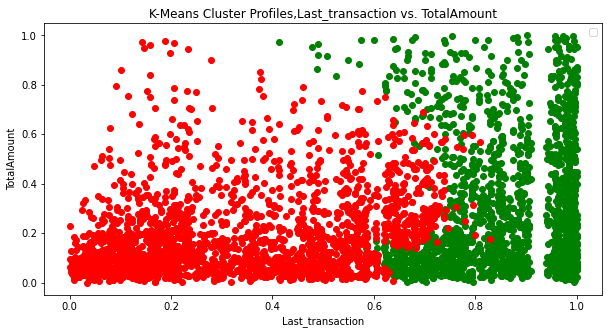

In [77]:
# Visualize the clusters with scaled data:
df1 = df_k[df_k.two_clusters==0]
df2 = df_k[df_k.two_clusters==1]
plt.figure(figsize=(10,5))
plt.scatter(df1.Last_transaction,df1['TotalAmount'],color='green')
plt.scatter(df2.Last_transaction,df2['TotalAmount'],color='red')
plt.legend()
plt.xlabel('Last_transaction')
plt.ylabel('TotalAmount')
plt.title('K-Means Cluster Profiles,Last_transaction vs. TotalAmount')
plt.show()

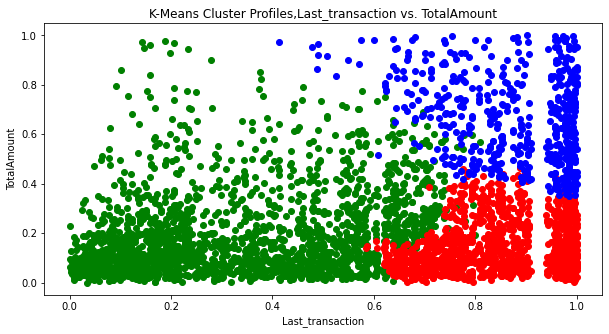

In [76]:
# Visualize the clusters with scaled data:
df1 = df_k[df_k.three_clusters==0]
df2 = df_k[df_k.three_clusters==1]
df3 = df_k[df_k.three_clusters==2]
plt.figure(figsize=(10,5))
plt.scatter(df1.Last_transaction,df1['TotalAmount'],color='green')
plt.scatter(df2.Last_transaction,df2['TotalAmount'],color='red')
plt.scatter(df3.Last_transaction,df3['TotalAmount'],color='blue')
plt.xlabel('Last_transaction')
plt.ylabel('TotalAmount')
plt.title('K-Means Cluster Profiles,Last_transaction vs. TotalAmount')
plt.show()